In [2]:
import os
from Bio.SeqIO import QualityIO
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import gzip
import glob
import re
from DMS_utils import dna_rev_comp, translate_dna2aa
import pysam
import pandas as pd
import seaborn as sns
import pickle as pkl
import matplotlib.colors as mcolors
from scipy import stats
import os.path
from matplotlib.lines import Line2D
import json
import shutil
from evaluation_functions import *
from Bio import SeqIO
import matplotlib.patches as patches
import csv

In [3]:
amplicon_DNA = "CTGCTGGCGATTAACCTGCTGGAACAGCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTTTAGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGACCCGCGCCTTCCCGACAATCCAATTATTTTTGCGTCCGATAGCTTCCTGCAATTAACCGAATACAGCCGCGAAGAAATTCTGGGTCGTAATTGTCGCTTCCTTCAGGGGCCAGAGACTGACCGTGCTACGGTACGCAAAATCCGCGACGCAATCGACAATCAAACGGAAGTCACGGTTCAGTTGATTAACTATACGAAGAGCGGAAAAAAATTCTGGAATTTATTTCACTTGCAGCCTATGCGTGACCAGAAGGGCGATGTCCAGTATTTCATTGGCGTTCAGCTTGATGGTACCGAGCATGTTCGCGATGCTGCGGAGCGTGAAGGTGTAATGTTAATTAAAAAGACTGCTGAAAACATTGATGAGGCGGCCAAAGGGAGCCTGCATCCGCCGATGGATAACCGCGTGCGCGAAGCGTGCCAGTATATTAGCGATCATCTGGCGGATAGC"

LOV_DNA = "TTAGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGACCCGCGCCTTCCCGACAATCCAATTATTTTTGCGTCCGATAGCTTCCTGCAATTAACCGAATACAGCCGCGAAGAAATTCTGGGTCGTAATTGTCGCTTCCTTCAGGGGCCAGAGACTGACCGTGCTACGGTACGCAAAATCCGCGACGCAATCGACAATCAAACGGAAGTCACGGTTCAGTTGATTAACTATACGAAGAGCGGAAAAAAATTCTGGAATTTATTTCACTTGCAGCCTATGCGTGACCAGAAGGGCGATGTCCAGTATTTCATTGGCGTTCAGCTTGATGGTACCGAGCATGTTCGCGATGCTGCGGAGCGTGAAGGTGTAATGTTAATTAAAAAGACTGCTGAAAACATTGATGAGGCGGCCAAA"

In [4]:
## read seq
base_dir = os.getcwd()

retron_seqs = []
ref_seqs = []
trim_front = "TAACTACCAGTATCCACCGCCGTCTCAATTC" 
trim_back = "GTACTGAGACGATGATCCTATGCGTCTGTGT" 


with open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Pool.fasta', "rt") as read_file:

        reader = SeqIO.parse(open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Pool.fasta'),'fasta')
       
        for read in enumerate(reader):
                read_seq = read[1].seq
                print("ret", read_seq[read_seq.index(trim_front)+len(trim_front):read_seq.index(trim_back)])
                ## trim seq
                trim_read = str(read_seq[read_seq.index(trim_front)+len(trim_front):read_seq.index(trim_back)])
                retron_seqs.append(trim_read)

                ## find corresponding ref seq
                retron_start = trim_read[:20]
                retron_end = trim_read[-20:]
                ref_seq = dna_rev_comp(amplicon_DNA[amplicon_DNA.index(retron_start):amplicon_DNA.index(retron_end)+len(retron_end)])
                print("ref", ref_seq)
                ref_seqs.append(ref_seq)



# ## write to csv with semicolon separated
# with open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Refs', 'w') as myfile:
#         wr = csv.writer(myfile, delimiter=';')
#         wr.writerow(ref_seqs)
# with open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Pool_Trimmed', 'w') as myfile:
#         wr = csv.writer(myfile, delimiter=';')
#         wr.writerow(retron_seqs)

ret GCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTGCGGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGA
ref TCTGTGATTACGAAATTCTTTTCAATGCGTTCCAGCGTTGTGGCTAAACCGCTGCTTTCGTTAATCGCTTCCATGCGGCGCAGCAGCAGC
ret GCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTCGTGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGA
ref TCTGTGATTACGAAATTCTTTTCAATGCGTTCCAGCGTTGTGGCTAAACCGCTGCTTTCGTTAATCGCTTCCATGCGGCGCAGCAGCAGC
ret GCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTAACGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGA
ref TCTGTGATTACGAAATTCTTTTCAATGCGTTCCAGCGTTGTGGCTAAACCGCTGCTTTCGTTAATCGCTTCCATGCGGCGCAGCAGCAGC
ret GCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTGATGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGA
ref TCTGTGATTACGAAATTCTTTTCAATGCGTTCCAGCGTTGTGGCTAAACCGCTGCTTTCGTTAATCGCTTCCATGCGGCGCAGCAGCAGC
ret GCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTTGCGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGA
ref TCTGTGATTACGAAATTCTTTTCAATGCGTTCCAGCGTTGTGGCTAAACCGCTGCTTTCGTTAATCGCTTCCATGCGGCGCAGCAGCAGC
ret GCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTCAG

In [183]:
# refs1 = ref_seqs[:1000]
# retrons1 = retron_seqs[:1000]
# refs2 = ref_seqs[1000:2000]
# retrons2 = retron_seqs[1000:2000]
# refs3 = ref_seqs[2000:]
# retrons3 = retron_seqs[2000:]

# ## write to csv with semicolon separated
# ### has to be separated into 3 files because of the size limit of the calculation software https://www.unafold.org/Dinamelt/applications/two-state-melting-hybridization.php
# with open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Refs1', 'w') as myfile:
#         wr = csv.writer(myfile, delimiter=';')
#         wr.writerow(refs1)
# with open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Pool_Trimmed1', 'w') as myfile:
#         wr = csv.writer(myfile, delimiter=';')
#         wr.writerow(retrons1)

# with open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Refs2', 'w') as myfile:
#         wr = csv.writer(myfile, delimiter=';')
#         wr.writerow(refs2)
# with open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Pool_Trimmed2', 'w') as myfile:
#         wr = csv.writer(myfile, delimiter=';')
#         wr.writerow(retrons2)

# with open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Refs3', 'w') as myfile:
#         wr = csv.writer(myfile, delimiter=';')
#         wr.writerow(refs3)
# with open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Pool_Trimmed3', 'w') as myfile:
#         wr = csv.writer(myfile, delimiter=';')
#         wr.writerow(retrons3)

In [5]:
Energies = pd.read_csv(f'{base_dir}/data/UNAFold_results_AraC_S170_LOV_DMS_all.csv').iloc[:,1:5]
Energies.index = retron_seqs

In [6]:
Energies

,dG,dH,dS,Tm[°C]
GCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTGCGGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGA,-122.4,-727.1,-1949.7,94.9
GCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTCGTGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGA,-121.4,-730.2,-1963.0,94.0
GCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTAACGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGA,-121.2,-728.1,-1956.8,94.1
GCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTGATGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGA,-121.5,-729.5,-1960.4,94.2
GCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTTGCGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGA,-123.6,-736.2,-1975.2,94.8
...,...,...,...,...
AATGTTAATTAAAAAGACTGCTGAAAACATTGATGAGGCGGCCAGCGGGAGCCTGCATCCGCCGATGGATAACCGCGTGCGCGAAGCGTG,-122.0,-722.8,-1937.1,95.1
AATGTTAATTAAAAAGACTGCTGAAAACATTGATGAGGCGGCCACCGGGAGCCTGCATCCGCCGATGGATAACCGCGTGCGCGAAGCGTG,-122.8,-729.8,-1957.3,94.9
AATGTTAATTAAAAAGACTGCTGAAAACATTGATGAGGCGGCCTGGGGGAGCCTGCATCCGCCGATGGATAACCGCGTGCGCGAAGCGTG,-122.1,-712.3,-1902.9,96.2
AATGTTAATTAAAAAGACTGCTGAAAACATTGATGAGGCGGCCTATGGGAGCCTGCATCCGCCGATGGATAACCGCGTGCGCGAAGCGTG,-120.7,-725.9,-1951.3,94.0


In [73]:
## calculate the mean energy for each mut pos (mean over cols in steps of 20): 
mean_energies = pd.DataFrame()
pos = 0
for i in range(0, len(Energies.index), 20):
        mean_energies[f"mean_pos_{pos}"] = np.mean(Energies.iloc[i:i+20,:], axis=0)
        pos += 3
mean_energies = mean_energies.T
mean_energies.columns = Energies.columns

/var/folders/cg/wt3b_bn90c35ljrp5m4821pw0000gn/T/ipykernel_1387/287861830.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mean_energies[f"mean_pos_{pos}"] = np.mean(Energies.iloc[i:i+20,:], axis=0)
/var/folders/cg/wt3b_bn90c35ljrp5m4821pw0000gn/T/ipykernel_1387/287861830.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mean_energies[f"mean_pos_{pos}"] = np.mean(Energies.iloc[i:i+20,:], axis=0)
/var/folders/cg/wt3b_bn90c35ljrp5m4821pw0000gn/T/ipykernel_1387/287861830.py:5: PerformanceWarning: DataFrame is highly fragmented

In [74]:
mean_energies

,dG,dH,dS,Tm[°C]
mean_pos_0,-122.555,-729.355,-1956.500,94.815
mean_pos_3,-120.070,-728.170,-1960.665,93.445
mean_pos_6,-123.135,-733.610,-1968.325,94.760
mean_pos_9,-122.635,-731.095,-1961.820,94.695
mean_pos_12,-120.710,-729.945,-1964.350,93.655
...,...,...,...,...
mean_pos_408,-118.030,-715.350,-1925.870,93.410
mean_pos_411,-117.340,-719.280,-1940.865,92.600
mean_pos_414,-118.070,-719.205,-1938.165,93.065
mean_pos_417,-118.170,-725.755,-1958.990,92.530


In [75]:
mut_rates = pd.read_csv(f"{base_dir}/output/RL8_AraCLOV2/R1/RL8_AraCLOV2_Codon_mut_rate_per_pos.csv", index_col=0).T

In [76]:
region_of_interest ="TTAGCCACAAC"
roi_start = amplicon_DNA.index(region_of_interest) if region_of_interest else 0
roi_len = len(mut_rates.columns)
cut_end = 18

In [77]:
LOV_AA = translate_dna2aa(LOV_DNA)
LOV_AAs = [i for i in LOV_AA]

In [78]:
mean_energies_roi = pd.DataFrame(mean_energies.loc[:,"dG"]).T.iloc[:,:roi_len-cut_end]
mut_rates_roi = mut_rates.iloc[:,:-cut_end]

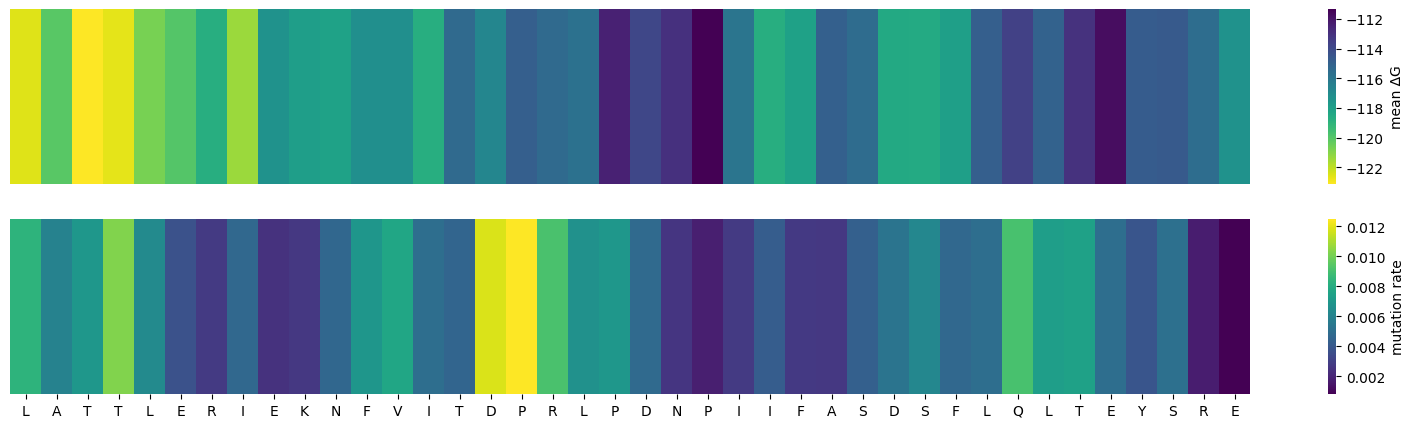

In [79]:
fig, ax = plt.subplots(2,1,figsize=(20,5))

sns.heatmap(mean_energies_roi, cmap="viridis_r", ax = ax[0], cbar_kws={'label': 'mean ∆G'}, yticklabels=False, xticklabels=False)
sns.heatmap(mut_rates_roi, cmap="viridis", ax = ax[1], cbar_kws={'label': 'mutation rate'}, yticklabels=False)
ax[1].set_xticklabels(LOV_AAs[:roi_len-cut_end])
plt.show()

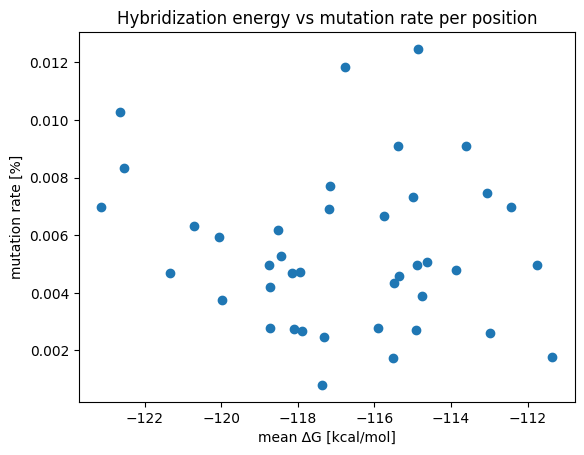

In [81]:
plt.plot(mean_energies_roi.values.flatten(),mut_rates_roi.values.flatten(), "o")
plt.title("Hybridization energy vs mutation rate per position")
plt.xlabel("mean ∆G [kcal/mol]")
plt.ylabel("mutation rate [%]")
plt.show()


In [82]:
mut_pos_start = 43

sorted_retron = {} ## sort retrons by #diffs to ref
for idx, retron in enumerate(retron_seqs):
    ref_comp = dna_rev_comp(ref_seqs[idx])
    n_diff = sum([1 for i in range(len(retron)) if retron[i] != ref_comp[i]])
    if n_diff not in sorted_retron:
        sorted_retron[n_diff] = {retron}
    else:
        sorted_retron[n_diff].add(retron)


In [83]:
sorted_energies = {}
for key, value in sorted_retron.items():
    sorted_energies[key] = Energies.loc[list(value),:]
    

In [84]:
sorted_dGs = {}
for n_diff, df in sorted_energies.items():
    sorted_dGs[n_diff] = df.loc[:,"dG"].values
    

In [85]:
for key, value in sorted_retron.items():
    print(key, len(value))  

3 1152
2 1182
1 426
0 60


In [86]:
codons = [LOV_DNA[i:i+3] for i in range(0, len(LOV_DNA),3)]

In [87]:
ecoli_pref = { ### codons used for retron library (RL8) construction
            "A": 'GCG',
            "R": 'CGT',
            "N": 'AAC',
            "D": 'GAT',
            "C": 'TGC',
            "Q": 'CAG',
            "E": 'GAA',
            "G": 'GGC',
            "H": 'CAT',
            "I": 'ATT',
            "L": "CTG",
            "K": 'AAA',
            "M": 'ATG',
            "F": "TTT",
            "P": 'CCG',
            "S": 'AGC',
            "T": 'ACC',
            "W": 'TGG',
            "Y": "TAT",
            "V": 'GTG',
}

In [88]:
sum([i in ecoli_pref.values() for i in codons])

60

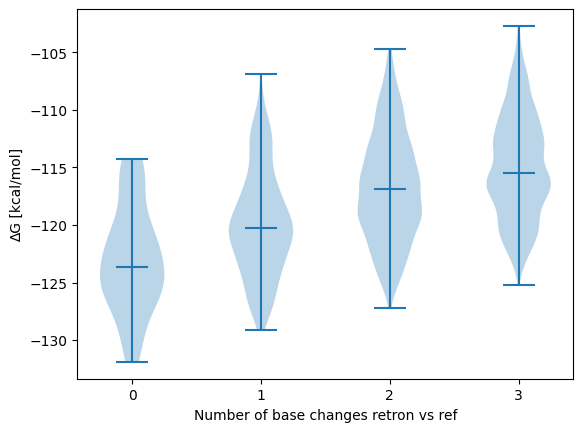

In [89]:
plt.violinplot(sorted_dGs.values(), positions=sorted_dGs.keys(),showmedians=True)
plt.xlabel("Number of base changes retron vs ref")
plt.ylabel("∆G [kcal/mol]")
plt.xticks(list(sorted_dGs.keys()))

plt.show()